## ДЗ 4
## Выберите ряд из первого задания и постройте его модель GARCH. Отчет нужно будет оформить в jupyter-ноутбук.


In [140]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [7]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

### Возьмем ряд по месячным продажам машин в Квебеке

In [9]:
series = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")['Count']

## Подберем гиперпараметры для GARCH с помощью модели ARIMA

In [11]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)
warnings.filterwarnings("ignore")

i:   0%|          | 0/12 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

d:   0%|          | 0/4 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

j:   0%|          | 0/5 [00:00<?, ?it/s]

aic: 1902.62315 | order: (10, 2, 4)
Results of Dickey-Fuller Test:
Test Statistic                -9.861604e+00
p-value                        4.218704e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
dtype: float64


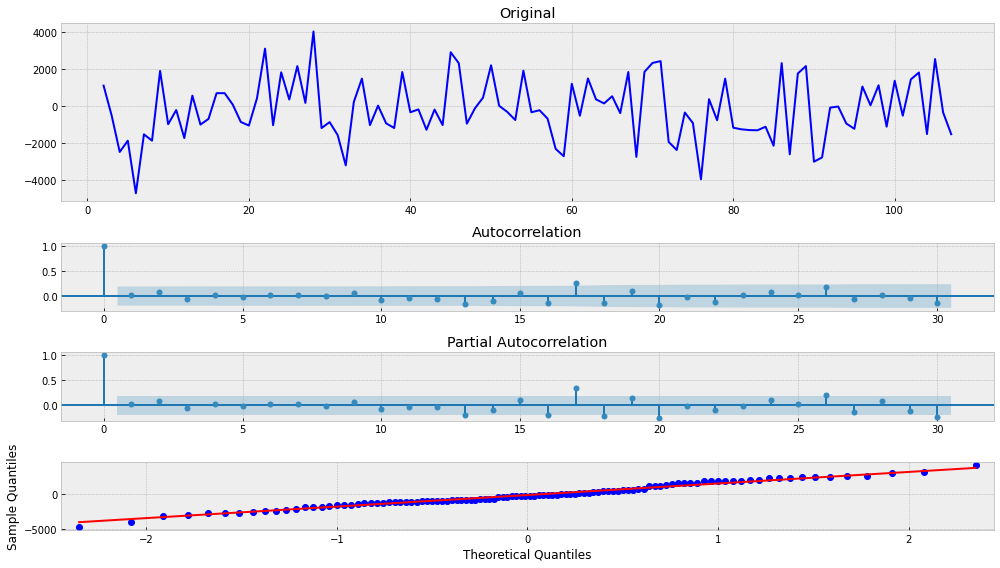

In [24]:
# Подберем лучшие параметры для модели ARIMA
best_aic = np.inf 
best_order = None
best_mdl = None

for i in tqdm(range(12), "i"):
    for d in tqdm(range(4), "d", leave = False):
        for j in tqdm(range(5), "j", leave = False):
            try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=30)

#### Оптимальные гиперпараметры  (10, 2, 4)

## Применим модель GARCH

In [4]:
from arch import arch_model

In [137]:

series_g = boxcox(series, 0)
#series_g = series_g[12:] - series_g[:-12]
series_g = series_g[1:] - series_g[:-1]

# Гиперпараметры возьмем из модели ARIMA
p_ = 10
o_ = 2
q_ = 4


am = arch_model(series_g, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
scale = res.scale
print(res.summary())


                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                5.44819
Distribution:      Standardized Student's t   AIC:                           27.1036
Method:                  Maximum Likelihood   BIC:                           77.8874
                                              No. Observations:                  107
Date:                      Fri, Jun 04 2021   Df Residuals:                      106
Time:                              18:47:40   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

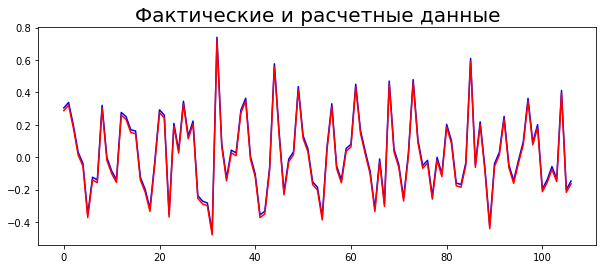

In [148]:
plt.figure(figsize=(10,4))
plt.plot(res.resid, color='blue',)
plt.plot(series_g, color='red')
plt.title('Фактические и расчетные данные', fontsize=20)
plt.show()

### Посмотрим качество модели

In [141]:
r2_score(series_g, res.resid)

0.9949402527299613

### Построим прогноз волатильности на 10 периодов

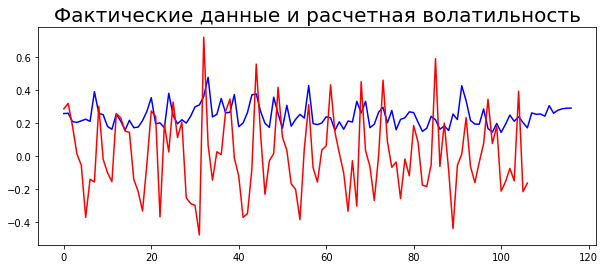

In [151]:
forecast = res.forecast(horizon=10)
plt.figure(figsize=(10,4))
con = np.concatenate((res.conditional_volatility, np.sqrt(forecast.variance.values[-1, :])), axis=0)
#plt.plot(res.conditional_volatility, color='green',)
plt.plot(con, color='blue',)
plt.plot(series_g, color='red')
plt.title('Фактические данные и расчетная волатильность', fontsize=20)
plt.show()


In [ ]:
for _ in range(107):
    new_vol = np.sqrt(omega + 
                      alpha_1*series[-1]**2 + 
                      alpha_2*series[-2]**2 + 
                      beta_1*vols[-1]**2 + 
                      beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

## Попробуем спрогнозировать график классическим ML

Генерируем большое количество фичей для нашего временного ряда

In [81]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):
    
    data = pd.DataFrame(data.copy())
    
    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data)*(1-test_size))
    
    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.Count.shift(i)
        
    data = data.dropna()
    data = data.reset_index(drop=True)
    #data = data.drop(["Month"], axis=1)
     
    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["Count"], axis=1)
    y_train = data.loc[:test_index]["Count"]
    X_test = data.loc[test_index:].drop(["Count"], axis=1)
    y_test = data.loc[test_index:]["Count"]
    
    return X_train, X_test, y_train, y_test

In [82]:
X_train, X_test, y_train, y_test = prepareData(series, lag_start=1, lag_end=20, test_size=0.3)

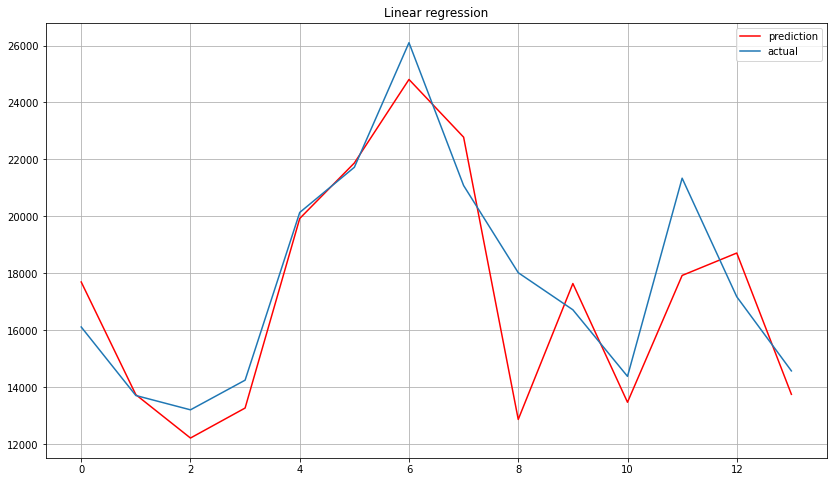

In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression")
plt.grid(True);

### Посмотрим качество модели

In [85]:
r2_score(y_test.values, prediction)

0.726443191200023

### Классическая модель неплохо предсказывает тестовые данные